### Multivariable functions, partial derivatives and plots

In [1]:
%run core.ipynb

In [2]:
def plot_mapping(f, a=-1.0, b=1.0, s=0.05, size=(8, 6)):
    X, Y = meshgrid(np.arange(a, b, s), np.arange(a, b, s))
    Z = f(X, Y)
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,
                    Y,
                    Z,
                    cstride=1,
                    rstride=1,
                    linewidth=0,
                    antialiased=False)
    plot.show()

In [3]:
def f(x, y):
    return x * y * (x**2 - y**2) / (x**2 + y**2)


u = f(x, y)

#### Multivariable mapping

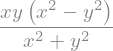

In [7]:
f(x, y)

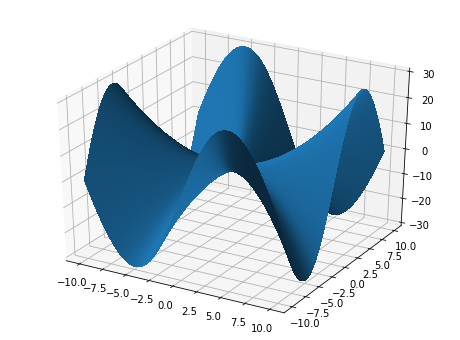

In [4]:
a, b, s = -10.0001, 10.0, 0.1  # ommitting the origin (0, 0)
plot_mapping(f, a=a, b=b, s=s)

#### Partial derivatives

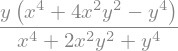

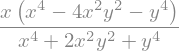

In [5]:
simplify(u.diff(x))
simplify(u.diff(y))

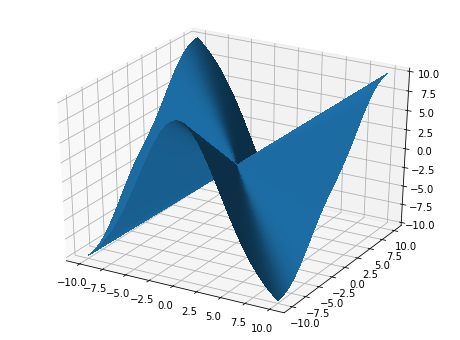

In [6]:
plot_mapping(lambdify((x, y), u.diff(x), modules='numpy'), a=a, b=b, s=s)

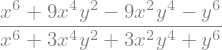

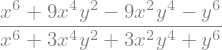

In [7]:
simplify(u.diff(x).diff(y))
simplify(u.diff(y).diff(x))

#### Mixed partial derivatives

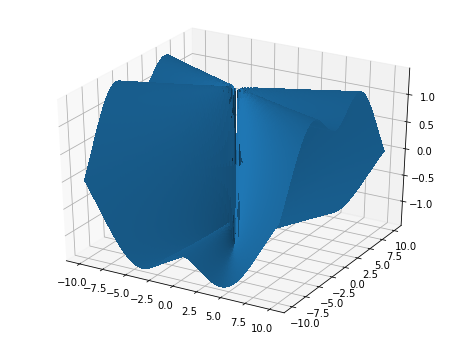

In [8]:
plot_mapping(lambdify((x, y), u.diff(y).diff(x), modules='numpy'),
             a=a,
             b=b,
             s=s)